In [ ]:
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os


In [ ]:
#with ZipFile('/content/drive/MyDrive/facial_expression.zip','r') as zipobj:
  #zipobj.extractall('drive/MyDrive/Colab Notebooks/origin')


In [ ]:
test_dir="/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test"
train_dir="/content/drive/MyDrive/Colab Notebooks/origin/Dataset/train"
BATCH_SIZE=64

In [ ]:
for classes in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, classes)
    length = len(os.listdir(class_dir))
    print(f"{classes}: {length}")

anger: 4462
disgust: 493
fear: 4593
happiness: 8110
neutral: 5572
sadness: 5483
surprise: 1414


In [ ]:
for classes in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, classes)
    length = len(os.listdir(class_dir))
    print(f"{classes}: {length}")

anger: 491
disgust: 55
fear: 528
happiness: 879
neutral: 626
sadness: 594
surprise: 416


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.choice(os.listdir(target_folder))
    img = mpimg.imread(os.path.join(target_folder, random_image))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image Shape: {img.shape}")

    return img

In [ ]:
class_names = ['anger','disgust','fear','happiness','neutral','sadness','surprise']

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_dir,
                                               target_size=(128,128),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

Found 30126 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


MODEL BUILDING: CNN(CLASSIFIER)

In [ ]:
#Initialising classsifier
model=Sequential()

#Step 1: Convolution
model.add(Conv2D(16,(3,3), input_shape=(128,128,3), activation='relu'))

#step 2: Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

#step 3: ADDING A SECOND CONVOLUTIONAL LAYER
model.add(Conv2D(32,(3,3), input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=7,activation='softmax'))

model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
#training_set[0][1].shape
test_set[0][1].shape

(64, 7)

In [18]:
history = model.fit(training_set,
                    epochs=20,
                    validation_data=test_set,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))
model.save('model1.h5')

Epoch 1/20
471/471 [==============================] - 6945s 15s/step - loss: 1.6637 - accuracy: 0.3339 - val_loss: 1.5875 - val_accuracy: 0.3834
Epoch 2/20
471/471 [==============================] - 358s 759ms/step - loss: 1.5182 - accuracy: 0.4038 - val_loss: 1.4569 - val_accuracy: 0.4416
Epoch 3/20
471/471 [==============================] - 363s 769ms/step - loss: 1.4253 - accuracy: 0.4422 - val_loss: 1.4369 - val_accuracy: 0.4492
Epoch 4/20
471/471 [==============================] - 355s 752ms/step - loss: 1.3674 - accuracy: 0.4637 - val_loss: 1.3791 - val_accuracy: 0.4726
Epoch 5/20
471/471 [==============================] - 358s 759ms/step - loss: 1.3284 - accuracy: 0.4800 - val_loss: 1.3238 - val_accuracy: 0.4756
Epoch 6/20
471/471 [==============================] - 358s 760ms/step - loss: 1.2883 - accuracy: 0.5005 - val_loss: 1.3210 - val_accuracy: 0.4870
Epoch 7/20
471/471 [==============================] - 355s 753ms/step - loss: 1.2662 - accuracy: 0.5085 - val_loss: 1.2911 - 

In [19]:
model.evaluate(test_set)

57/57 [==============================] - 15s 262ms/step - loss: 1.2662 - accuracy: 0.5252


[1.2662240266799927, 0.5252159237861633]

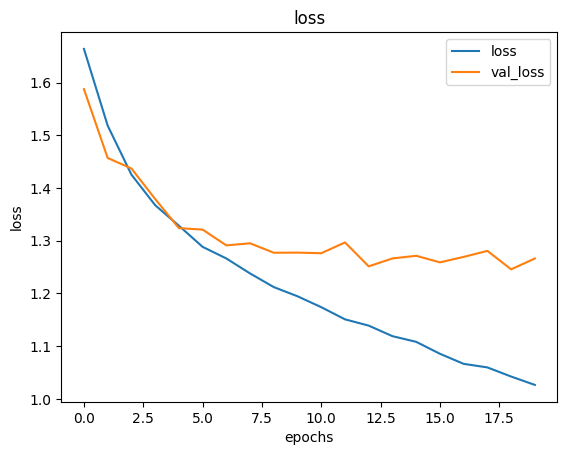

In [21]:
import pandas as pd
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss');

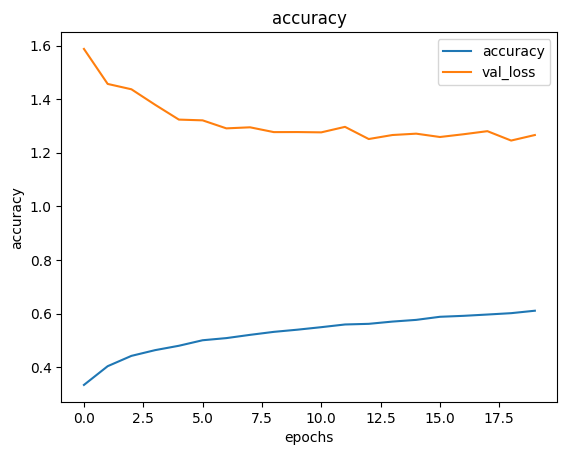

In [22]:
pd.DataFrame(history.history)[['accuracy','val_loss']].plot()
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy');

In [27]:
from tensorflow import keras
model_path="model1.h5"
loaded_model=keras.models.load_model(model_path)

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/origin/Dataset/test/anger/104125363.png")
image_fromarray=Image.fromarray(image,'RGB')
resize_image=image_fromarray.resize((128,128))
expand_input=np.expand_dims(resize_image, axis=0)
input_data=np.array(expand_input)
input_data=input_data/255

pred=loaded_model.predict(input_data)
result=pred.argmax()
result

1/1 [==============================] - 0s 108ms/step


0

In [28]:
training_set.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happiness': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}